In [1]:
import sys
# !{sys.executable} -m pip install shap
from glob import glob
import numpy as np
import joblib
import os
import pandas as pd
import json

import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from tqdm.notebook import tqdm
import seaborn as sns
from collections import Counter

# SHAP
import shap

In [2]:
trainsize=[ 0.1,0.3, 0.5, 0.7,0.8]

In [3]:


gaussian_kernel = RBF()

models = {
    'ridge': Ridge(),
    'lasso': Lasso(),
    'elastic': ElasticNet(),
    'knn': KNeighborsRegressor(),
    'rfr': RandomForestRegressor(),
    'grad': GradientBoostingRegressor(),
    'svr': SVR(),
    'krr': KernelRidge(),
    'gpr': GaussianProcessRegressor()
}

param_grid = {
    'ridge': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000]
    },
    'knn': {
        'n_neighbors': range(1, 10),
        'weights': ['uniform', 'distance']
    },
    'rfr': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'grad': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 5, 7]
    },
    'svr': {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
        'epsilon': [0.1, 0.01, 0.001]
    },
    'krr': {
        'kernel': ['linear', 'poly', 'rbf'],
        'alpha': [0.001, 0.01, 0.1, 1],
        'gamma': [1, 0.1, 0.01, 0.001]
    },
    'gpr': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
        'kernel': [gaussian_kernel]
    },
    'lasso': {
        'alpha': [0.001, 0.01, 0.1, 1],
        'max_iter': [1000, 2000, 3000]
    },
    'elastic': {
        'alpha': [0.001, 0.01, 0.1, 1],
        'l1_ratio': [0.2, 0.5, 0.8],
        'max_iter': [1000, 2000, 3000]
    }
}


In [4]:
def gridsearch(model,X_tr, y_tr,X_tst,y_tst):
    """
    Perform GridSearchCV for a given model

    parameters
    ----------
    model: str
        Name of model

    X_tr: np.array
        X training

    y_tr: np.array
        Y Training

    X_tst: np.array
        X test

    y_tst: np.array
        y test

    Returns
    -------
    scores: dict
        scored models
    """
    st = time.time()
    # Grab model and model parameters to perform gridsearchcv
    current_model = models[model]
    current_param_grid = param_grid[model]

    grid_search = GridSearchCV(current_model, current_param_grid, cv=5,n_jobs=-1)

    print(f'Now fitting {model}... ')

    grid_search.fit(X_tr, y_tr)

    best_model = grid_search.best_estimator_

    print(f'Completed fitting {model} in {time.time() - st} seconds. ')

    # Take the best model and evaluate using known metrics
    model=best_model
    scores = {}
    st = time.time()
    print('Now scoring model... ')
    y_tr_pred = model.predict(X_tr)
    y_tst_pred = model.predict(X_tst)

    plt.scatter(y_tr,y_tr_pred)
    plt.scatter(y_tst,y_tst_pred)
    plt.scatter(y_tr, y_tr)
    plt.scatter(y_tst,y_tst)
    plt.show()
            
    scores['MSE_train'] = mean_squared_error(y_tr, y_tr_pred),
    scores['R2_train'] = r2_score(y_tr, y_tr_pred)
    scores['MAE_train'] = mean_absolute_error(y_tr, y_tr_pred)
    scores['MSE_test'] = mean_squared_error(y_tst, y_tst_pred)
    scores['R2_test'] = r2_score(y_tst, y_tst_pred)
    scores['MAE_test'] = mean_absolute_error(y_tst, y_tst_pred)
    print(f"Train R2 {scores['R2_train']:.4f}")
    print(f"Test R2 {scores['R2_train']:.4f}")
    print(f"Train MAE {scores['MAE_train']:.4f}")
    print(f"Test MAE {scores['MAE_test']:.4f}")
    print()
    return scores



In [5]:
with open('../../database/currated_reps.bin','rb') as f:
    data=joblib.load(f)

In [6]:
y=data['y']

MACCS
AB
Now fitting ridge... 
Completed fitting ridge in 0.6092591285705566 seconds. 
Now scoring model... 


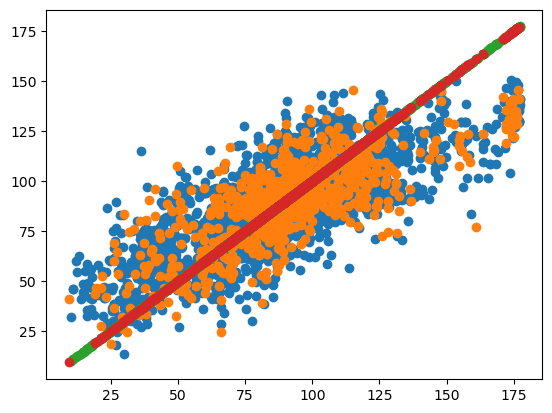

Train R2 0.5878
Test R2 0.5878
Train MAE 13.3491
Test MAE 14.0161

Now fitting lasso... 
Completed fitting lasso in 1.064751386642456 seconds. 
Now scoring model... 


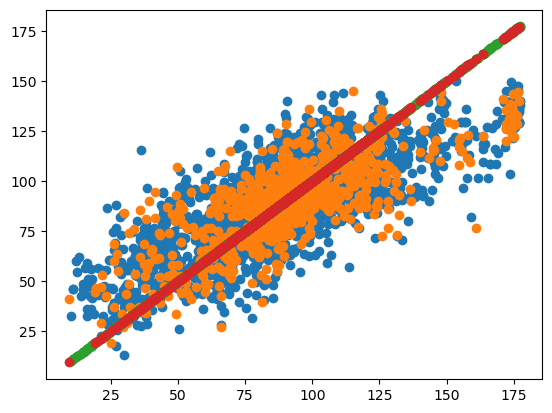

Train R2 0.5857
Test R2 0.5857
Train MAE 13.3800
Test MAE 13.9441

Now fitting elastic... 
Completed fitting elastic in 2.3838629722595215 seconds. 
Now scoring model... 


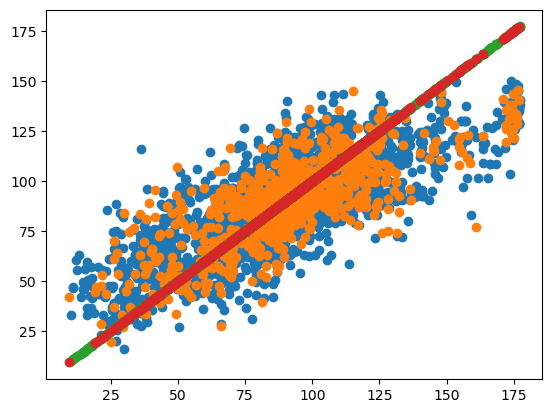

Train R2 0.5864
Test R2 0.5864
Train MAE 13.3898
Test MAE 13.9676

Now fitting knn... 
Completed fitting knn in 0.6545464992523193 seconds. 
Now scoring model... 


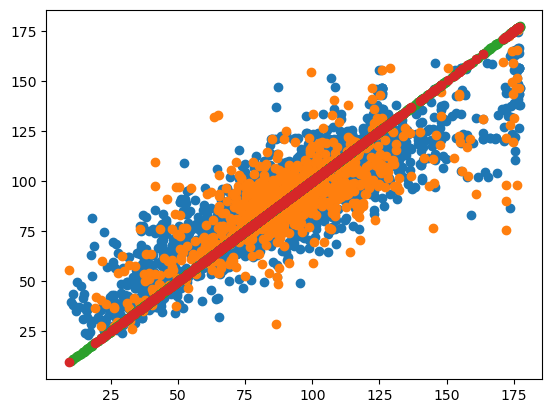

Train R2 0.7561
Test R2 0.7561
Train MAE 9.5440
Test MAE 12.4061

Now fitting rfr... 
Completed fitting rfr in 17.788821935653687 seconds. 
Now scoring model... 


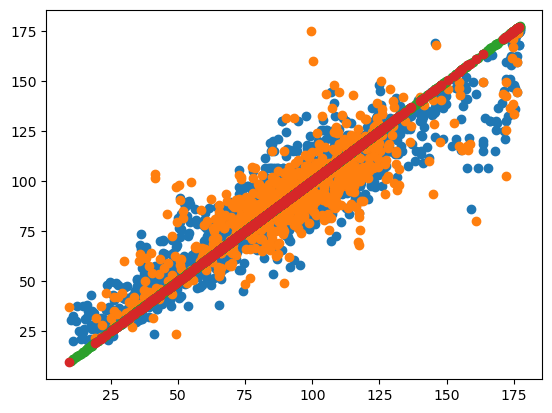

Train R2 0.8818
Test R2 0.8818
Train MAE 6.1534
Test MAE 9.6327

Now fitting grad... 
Completed fitting grad in 15.549731969833374 seconds. 
Now scoring model... 


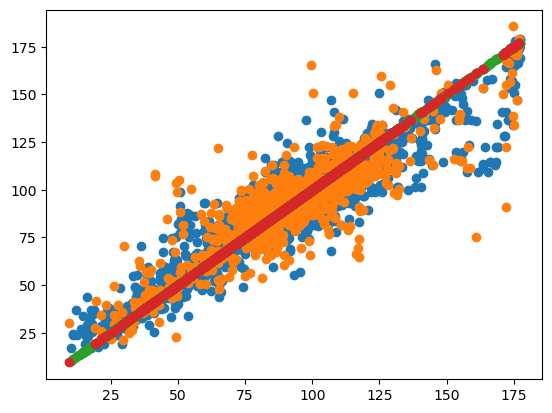

Train R2 0.8864
Test R2 0.8864
Train MAE 6.1243
Test MAE 9.7668

Now fitting svr... 
Completed fitting svr in 10.979431390762329 seconds. 
Now scoring model... 


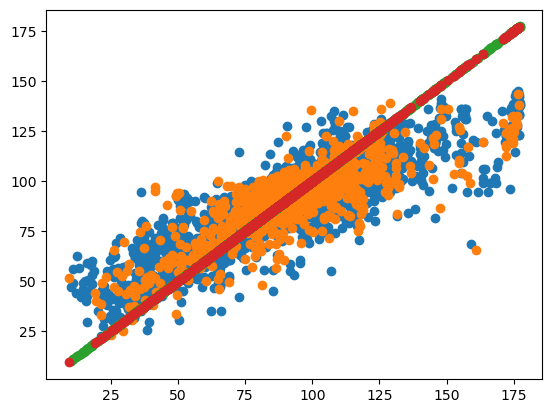

Train R2 0.7306
Test R2 0.7306
Train MAE 9.0638
Test MAE 11.3237

Now fitting krr... 
Completed fitting krr in 12.519719123840332 seconds. 
Now scoring model... 


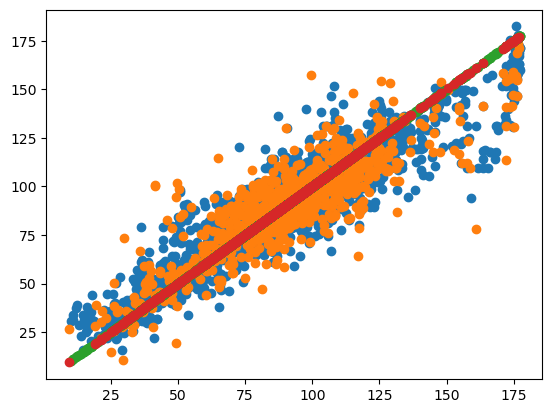

Train R2 0.8567
Test R2 0.8567
Train MAE 7.2451
Test MAE 10.2902

Now fitting gpr... 
Completed fitting gpr in 72.47275066375732 seconds. 
Now scoring model... 


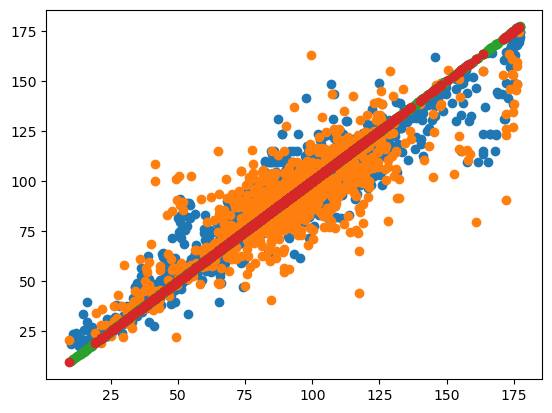

Train R2 0.9245
Test R2 0.9245
Train MAE 4.4551
Test MAE 10.8405

sub
Now fitting ridge... 
Completed fitting ridge in 0.16477203369140625 seconds. 
Now scoring model... 


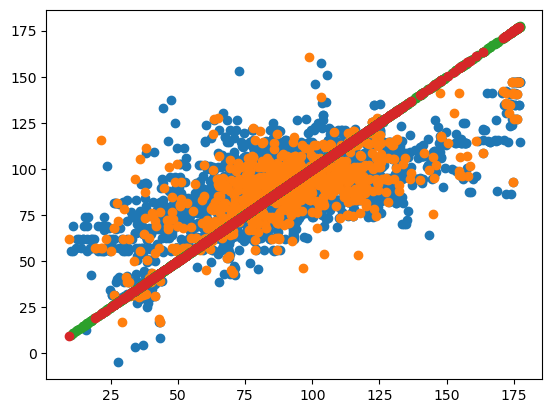

Train R2 0.4464
Test R2 0.4464
Train MAE 15.4251
Test MAE 15.6225

Now fitting lasso... 
Completed fitting lasso in 0.2735564708709717 seconds. 
Now scoring model... 


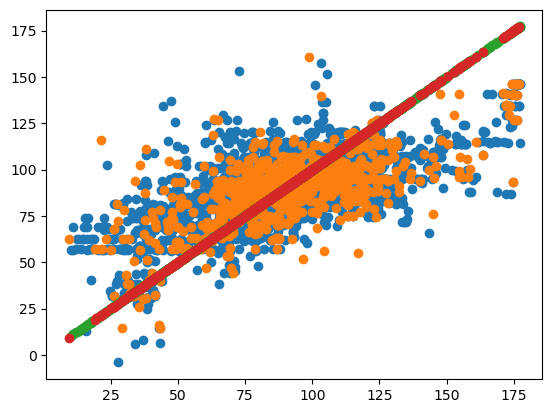

Train R2 0.4437
Test R2 0.4437
Train MAE 15.4525
Test MAE 15.6781

Now fitting elastic... 
Completed fitting elastic in 0.6105825901031494 seconds. 
Now scoring model... 


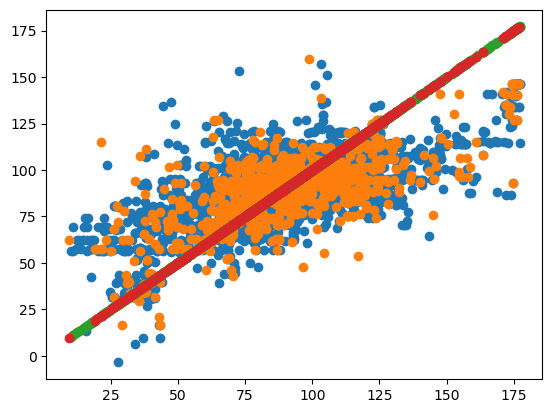

Train R2 0.4442
Test R2 0.4442
Train MAE 15.4554
Test MAE 15.6481

Now fitting knn... 
Completed fitting knn in 0.5632162094116211 seconds. 
Now scoring model... 


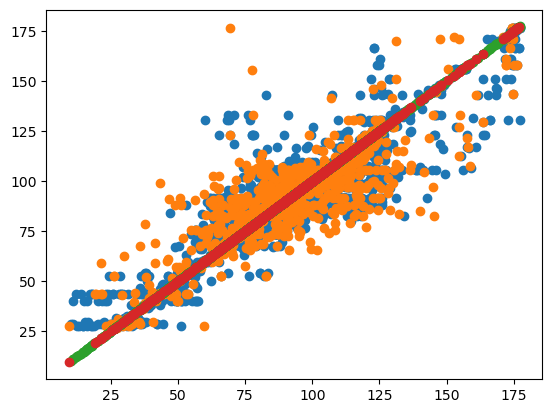

Train R2 0.8625
Test R2 0.8625
Train MAE 5.5259
Test MAE 10.3251

Now fitting rfr... 
Completed fitting rfr in 15.367862462997437 seconds. 
Now scoring model... 


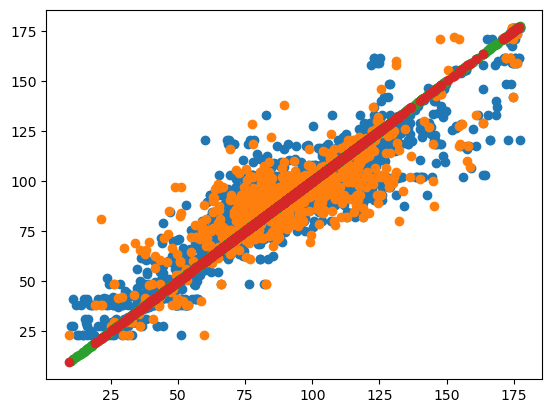

Train R2 0.8501
Test R2 0.8501
Train MAE 6.9248
Test MAE 9.6605

Now fitting grad... 
Completed fitting grad in 12.031699419021606 seconds. 
Now scoring model... 


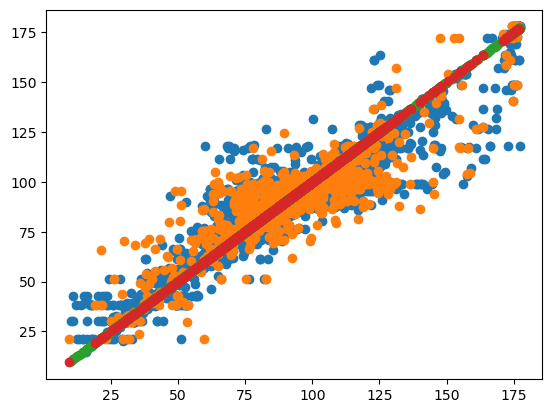

Train R2 0.8428
Test R2 0.8428
Train MAE 7.1892
Test MAE 9.6733

Now fitting svr... 
Completed fitting svr in 10.769068956375122 seconds. 
Now scoring model... 


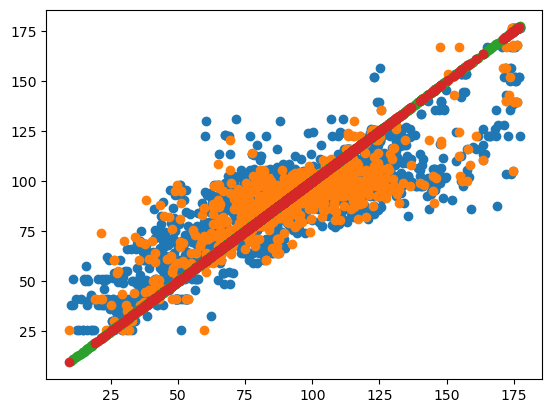

Train R2 0.7347
Test R2 0.7347
Train MAE 9.0268
Test MAE 10.8785

Now fitting krr... 
Completed fitting krr in 12.51436185836792 seconds. 
Now scoring model... 


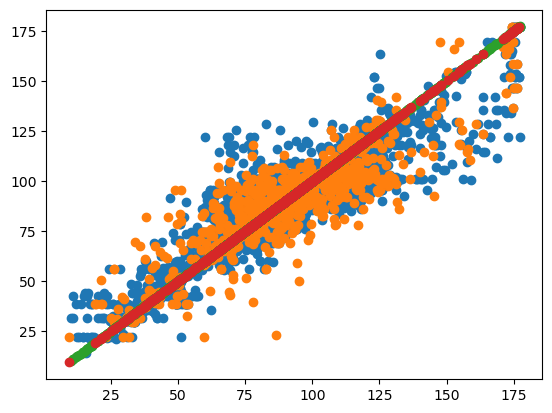

Train R2 0.8291
Test R2 0.8291
Train MAE 7.6767
Test MAE 10.2352

Now fitting gpr... 
Completed fitting gpr in 63.367403984069824 seconds. 
Now scoring model... 


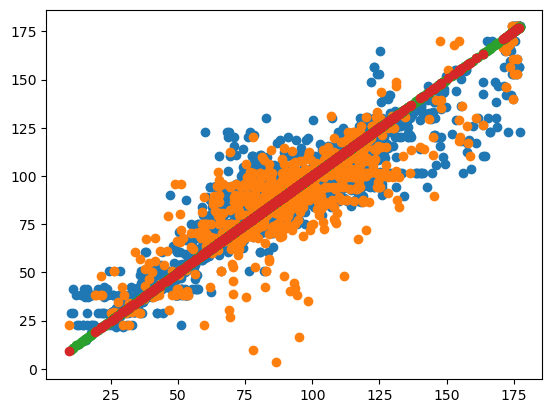

Train R2 0.8530
Test R2 0.8530
Train MAE 6.8492
Test MAE 10.8548


RDKit
AB
Now fitting ridge... 
Completed fitting ridge in 2.6205341815948486 seconds. 
Now scoring model... 


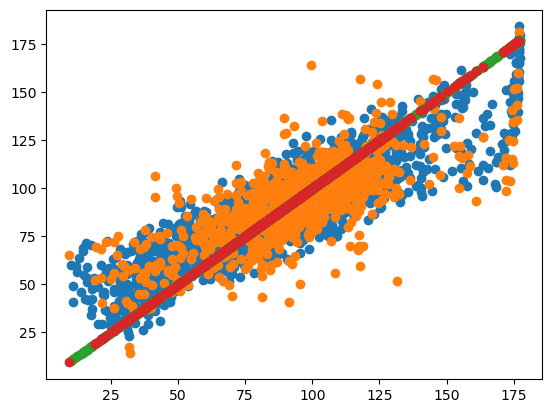

Train R2 0.7686
Test R2 0.7686
Train MAE 9.5361
Test MAE 13.8094

Now fitting lasso... 
Completed fitting lasso in 81.27566814422607 seconds. 
Now scoring model... 


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.378e+03, tolerance: 2.633e+02


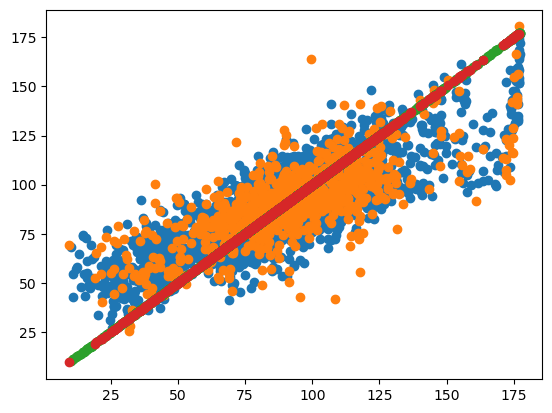

Train R2 0.6661
Test R2 0.6661
Train MAE 11.9783
Test MAE 14.0107

Now fitting elastic... 
Completed fitting elastic in 278.0542516708374 seconds. 
Now scoring model... 


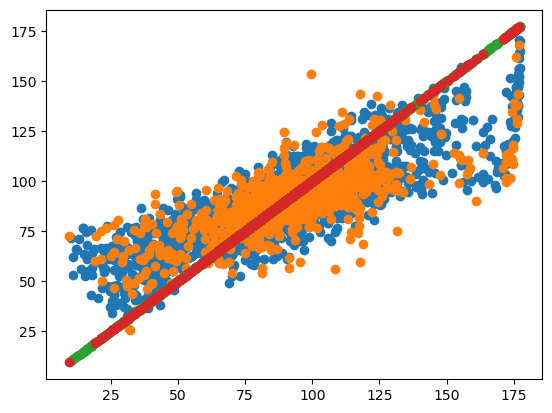

Train R2 0.6565
Test R2 0.6565
Train MAE 11.8050
Test MAE 14.0362

Now fitting knn... 
Completed fitting knn in 2.4642176628112793 seconds. 
Now scoring model... 


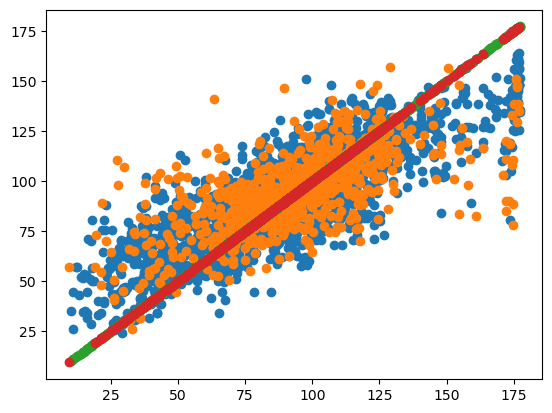

Train R2 0.6974
Test R2 0.6974
Train MAE 10.3759
Test MAE 14.3604

Now fitting rfr... 
Completed fitting rfr in 808.1129171848297 seconds. 
Now scoring model... 


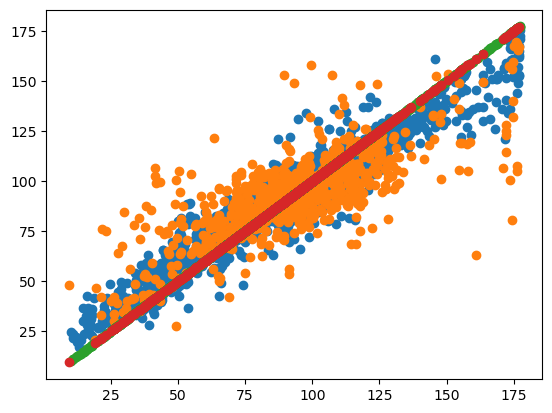

Train R2 0.9270
Test R2 0.9270
Train MAE 4.9556
Test MAE 12.2280

Now fitting grad... 
Completed fitting grad in 871.84712266922 seconds. 
Now scoring model... 


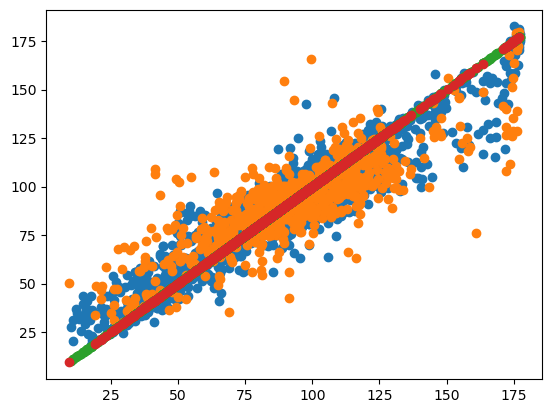

Train R2 0.9081
Test R2 0.9081
Train MAE 5.3593
Test MAE 11.3288

Now fitting svr... 
Completed fitting svr in 369.13980436325073 seconds. 
Now scoring model... 


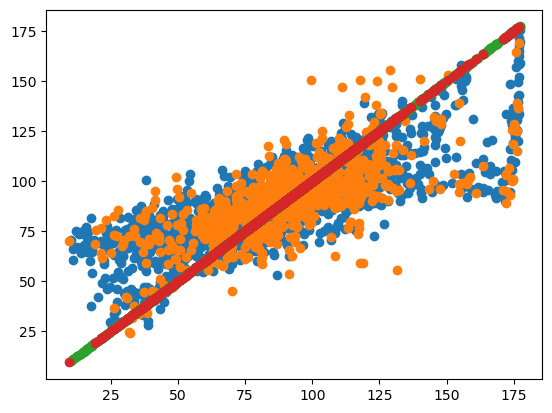

Train R2 0.6574
Test R2 0.6574
Train MAE 9.5805
Test MAE 14.0160

Now fitting krr... 
Completed fitting krr in 22.082504510879517 seconds. 
Now scoring model... 


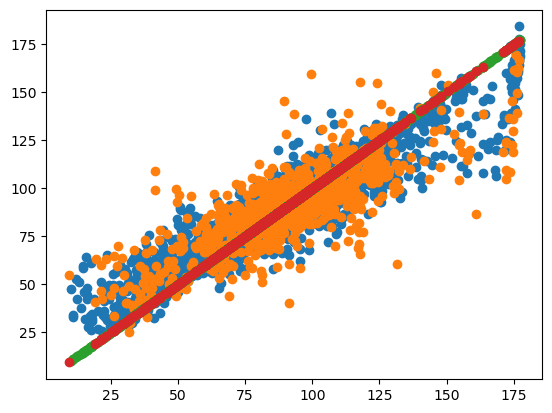

Train R2 0.8606
Test R2 0.8606
Train MAE 6.9466
Test MAE 12.3214

Now fitting gpr... 


/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.956e+03, tolerance: 2.113e+02
  model = cd_fast.enet_coordinate_descent(
/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.629e+02, tolerance: 2.113e+02
  model = cd_fast.enet_coordinate_descent(
/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

Completed fitting gpr in 672.668687582016 seconds. 
Now scoring model... 


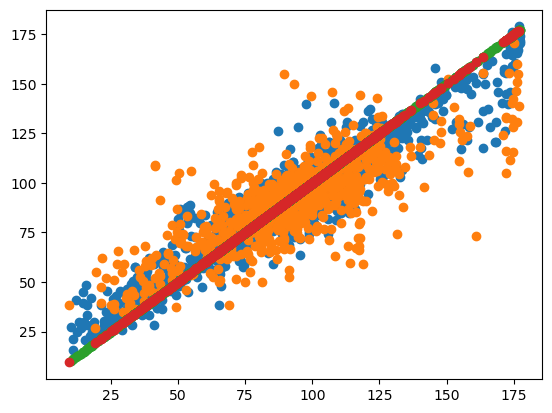

Train R2 0.9354
Test R2 0.9354
Train MAE 4.1176
Test MAE 12.3856

sub
Now fitting ridge... 
Completed fitting ridge in 2.58125901222229 seconds. 
Now scoring model... 


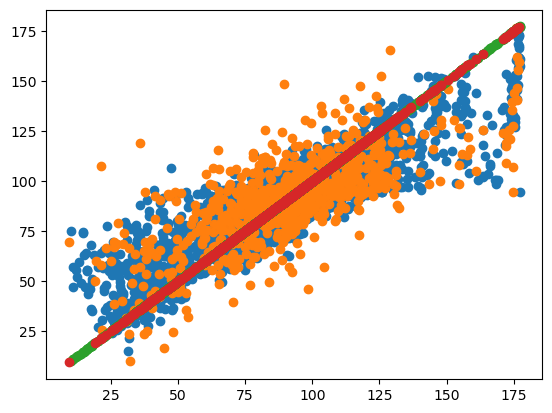

Train R2 0.7656
Test R2 0.7656
Train MAE 9.2419
Test MAE 13.8458

Now fitting lasso... 
Completed fitting lasso in 82.49029994010925 seconds. 
Now scoring model... 


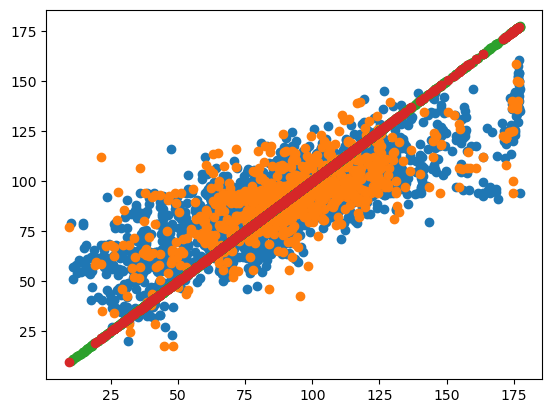

Train R2 0.6012
Test R2 0.6012
Train MAE 12.8124
Test MAE 14.5955

Now fitting elastic... 
Completed fitting elastic in 271.60431456565857 seconds. 
Now scoring model... 


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.802e+04, tolerance: 2.633e+02


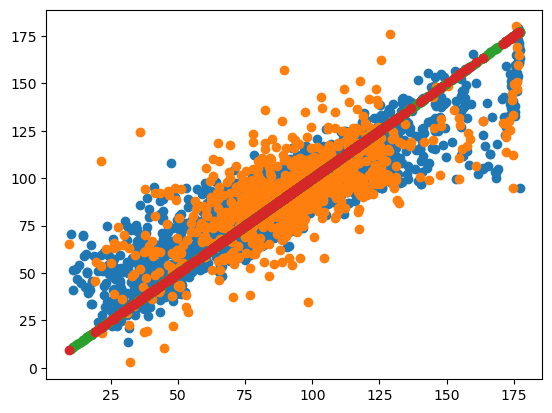

Train R2 0.7974
Test R2 0.7974
Train MAE 8.6448
Test MAE 14.0925

Now fitting knn... 
Completed fitting knn in 2.348025321960449 seconds. 
Now scoring model... 


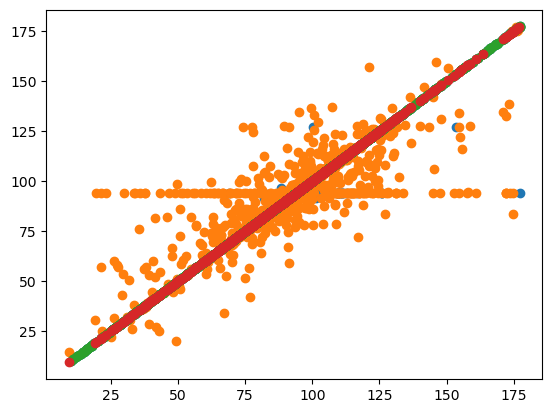

Train R2 0.9932
Test R2 0.9932
Train MAE 0.2111
Test MAE 10.1250

Now fitting rfr... 
Completed fitting rfr in 1342.8782382011414 seconds. 
Now scoring model... 


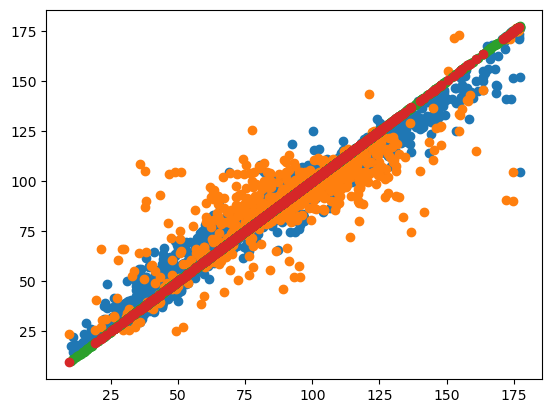

Train R2 0.9603
Test R2 0.9603
Train MAE 3.4285
Test MAE 8.9743

Now fitting grad... 
Completed fitting grad in 1011.2584939002991 seconds. 
Now scoring model... 


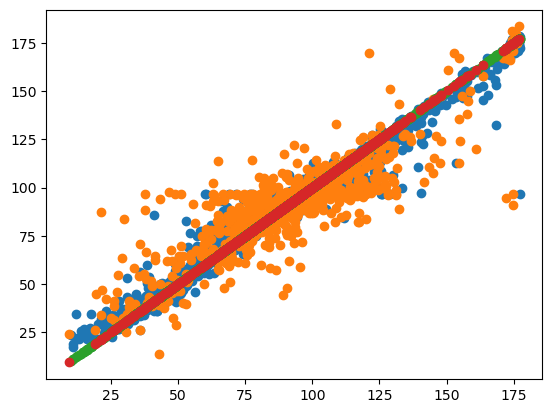

Train R2 0.9678
Test R2 0.9678
Train MAE 2.7407
Test MAE 9.2732

Now fitting svr... 
Completed fitting svr in 314.8982071876526 seconds. 
Now scoring model... 


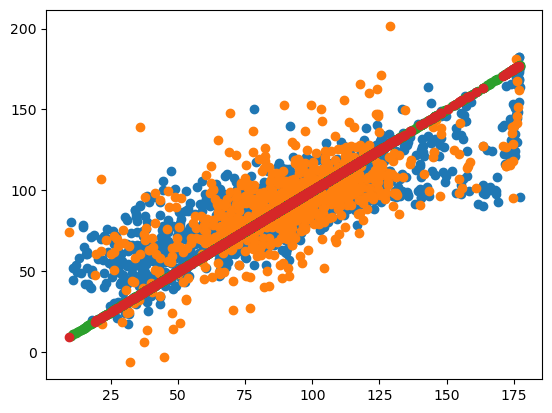

Train R2 0.7737
Test R2 0.7737
Train MAE 6.7311
Test MAE 15.2332

Now fitting krr... 
Completed fitting krr in 21.983575582504272 seconds. 
Now scoring model... 


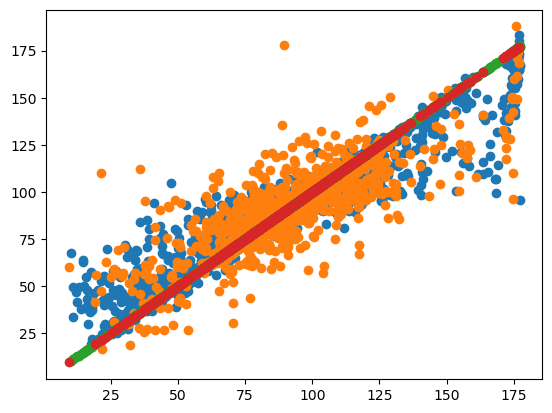

Train R2 0.8952
Test R2 0.8952
Train MAE 4.6366
Test MAE 12.4270

Now fitting gpr... 


/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.119e+03, tolerance: 2.066e+02
  model = cd_fast.enet_coordinate_descent(
/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.691e+04, tolerance: 2.137e+02
  model = cd_fast.enet_coordinate_descent(
/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

Completed fitting gpr in 643.0036029815674 seconds. 
Now scoring model... 


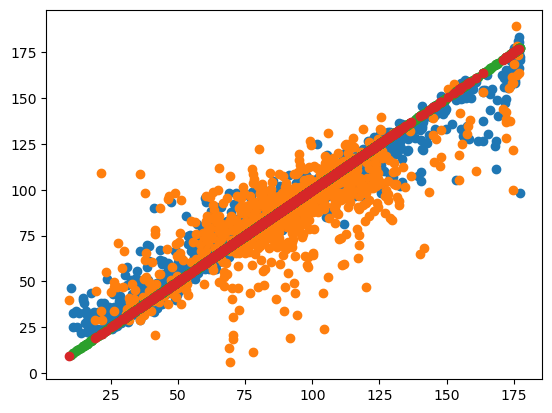

Train R2 0.9494
Test R2 0.9494
Train MAE 3.6122
Test MAE 12.8040


Morgan
AB
Now fitting ridge... 
Completed fitting ridge in 2.5439562797546387 seconds. 
Now scoring model... 


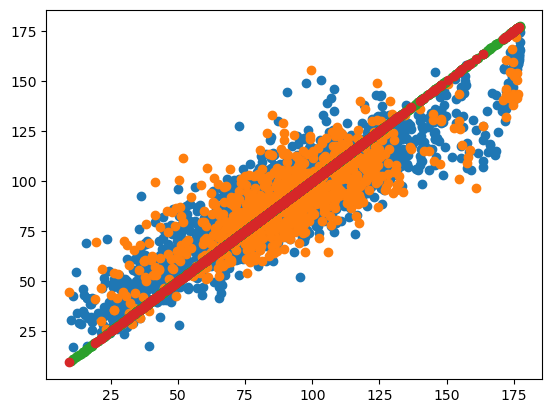

Train R2 0.7879
Test R2 0.7879
Train MAE 9.5226
Test MAE 12.5290

Now fitting lasso... 
Completed fitting lasso in 52.96646428108215 seconds. 
Now scoring model... 


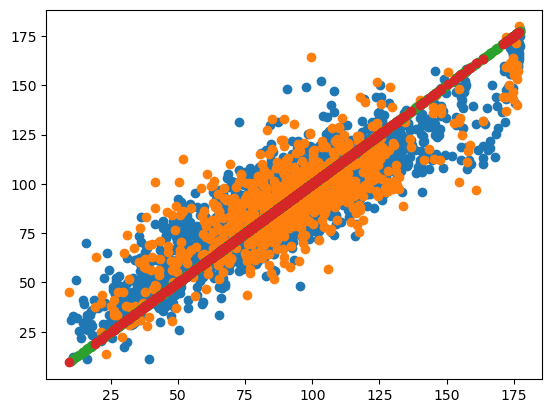

Train R2 0.7922
Test R2 0.7922
Train MAE 9.4085
Test MAE 12.6320

Now fitting elastic... 
Completed fitting elastic in 85.86162972450256 seconds. 
Now scoring model... 


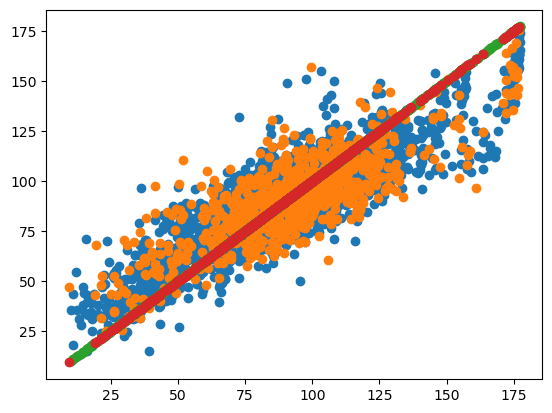

Train R2 0.7581
Test R2 0.7581
Train MAE 10.2545
Test MAE 12.4654

Now fitting knn... 
Completed fitting knn in 2.4009368419647217 seconds. 
Now scoring model... 


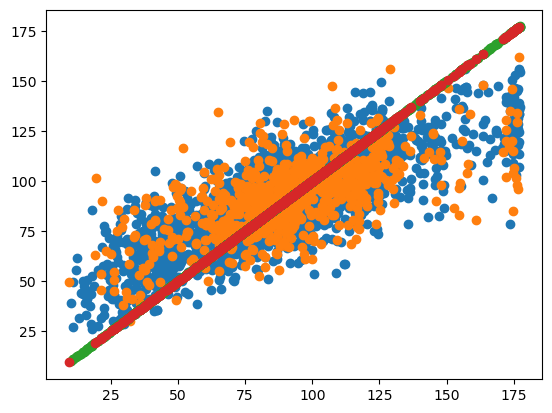

Train R2 0.6158
Test R2 0.6158
Train MAE 12.2667
Test MAE 15.7259

Now fitting rfr... 
Completed fitting rfr in 855.0318100452423 seconds. 
Now scoring model... 


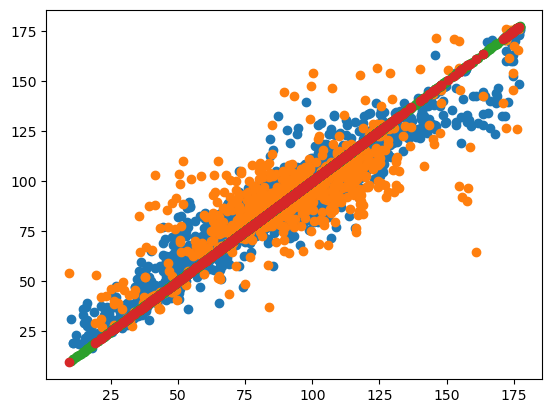

Train R2 0.9255
Test R2 0.9255
Train MAE 4.7767
Test MAE 10.2981

Now fitting grad... 
Completed fitting grad in 925.0781886577606 seconds. 
Now scoring model... 


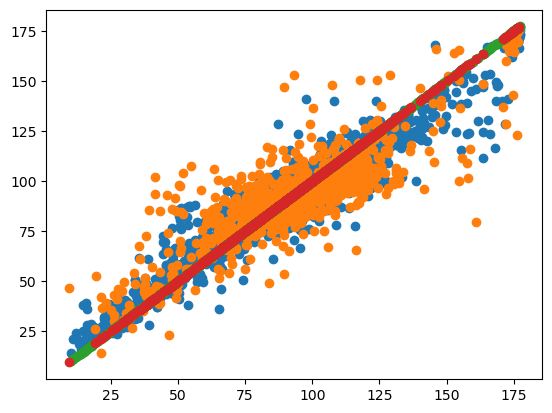

Train R2 0.9122
Test R2 0.9122
Train MAE 5.8654
Test MAE 10.7662

Now fitting svr... 
Completed fitting svr in 283.1182279586792 seconds. 
Now scoring model... 


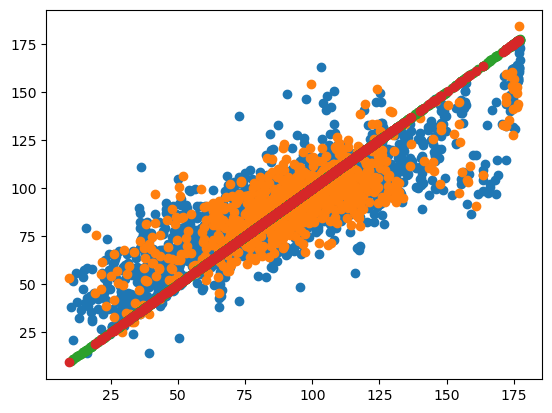

Train R2 0.7270
Test R2 0.7270
Train MAE 9.2819
Test MAE 12.4698

Now fitting krr... 
Completed fitting krr in 22.020735263824463 seconds. 
Now scoring model... 


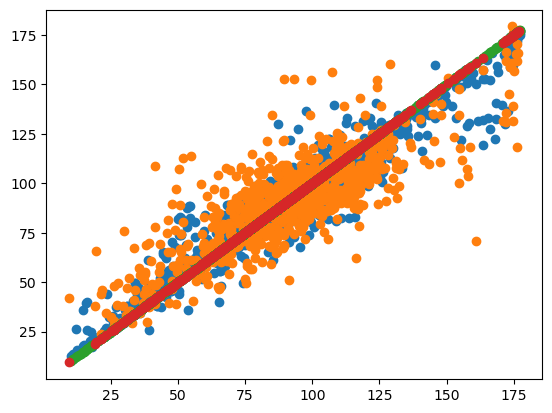

Train R2 0.9544
Test R2 0.9544
Train MAE 2.9497
Test MAE 11.9331

Now fitting gpr... 


/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.775e+02, tolerance: 2.113e+02
  model = cd_fast.enet_coordinate_descent(
/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.474e+03, tolerance: 2.066e+02
  model = cd_fast.enet_coordinate_descent(
/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

Completed fitting gpr in 601.3797342777252 seconds. 
Now scoring model... 


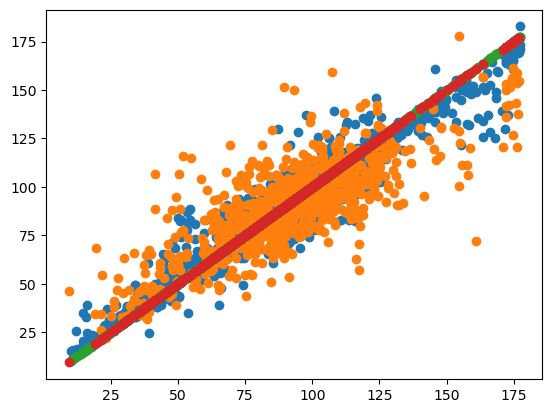

Train R2 0.9520
Test R2 0.9520
Train MAE 3.5818
Test MAE 12.7933

sub
Now fitting ridge... 
Completed fitting ridge in 2.54315447807312 seconds. 
Now scoring model... 


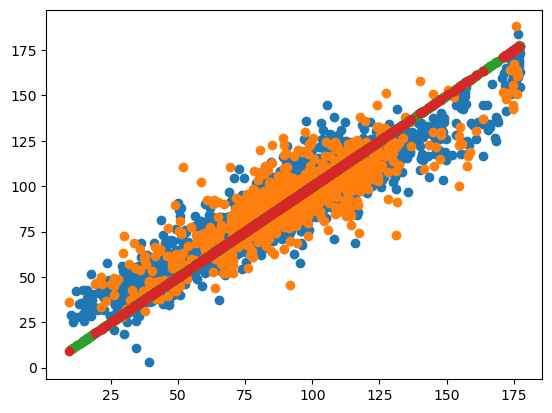

Train R2 0.8735
Test R2 0.8735
Train MAE 7.1405
Test MAE 10.0701

Now fitting lasso... 
Completed fitting lasso in 27.46416711807251 seconds. 
Now scoring model... 


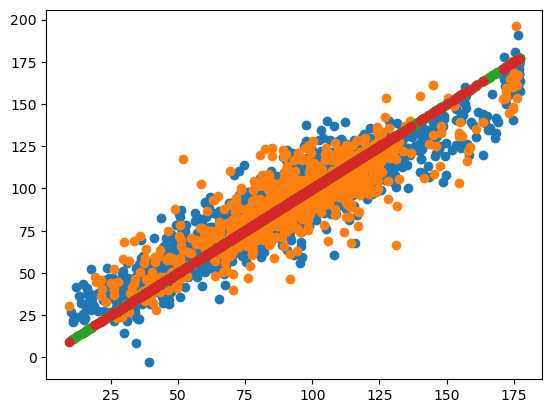

Train R2 0.8689
Test R2 0.8689
Train MAE 7.3090
Test MAE 10.1554

Now fitting elastic... 
Completed fitting elastic in 36.33287453651428 seconds. 
Now scoring model... 


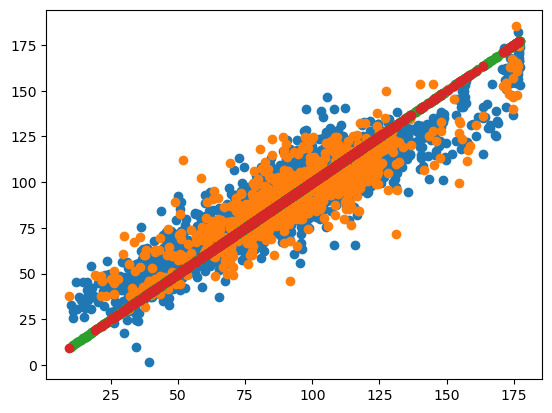

Train R2 0.8491
Test R2 0.8491
Train MAE 7.8244
Test MAE 9.9956

Now fitting knn... 
Completed fitting knn in 2.3884382247924805 seconds. 
Now scoring model... 


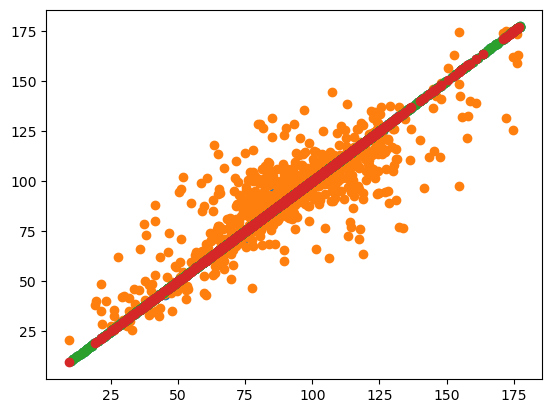

Train R2 0.9998
Test R2 0.9998
Train MAE 0.0564
Test MAE 8.7572

Now fitting rfr... 
Completed fitting rfr in 928.153653383255 seconds. 
Now scoring model... 


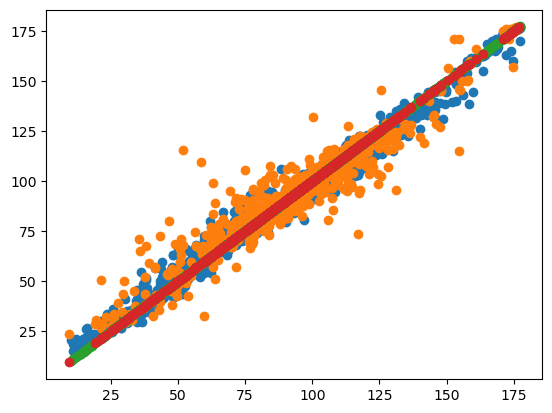

Train R2 0.9869
Test R2 0.9869
Train MAE 1.9156
Test MAE 4.9825

Now fitting grad... 
Completed fitting grad in 965.729629278183 seconds. 
Now scoring model... 


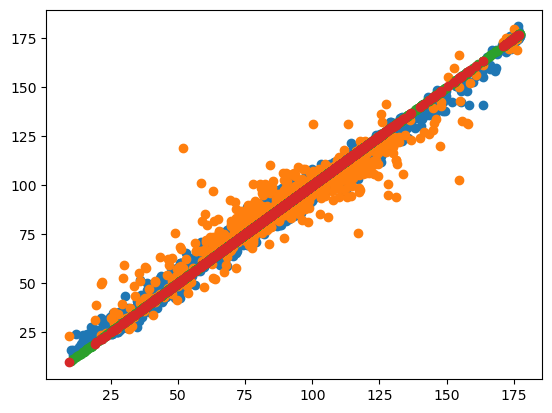

Train R2 0.9812
Test R2 0.9812
Train MAE 2.9181
Test MAE 5.8095

Now fitting svr... 
Completed fitting svr in 283.26736307144165 seconds. 
Now scoring model... 


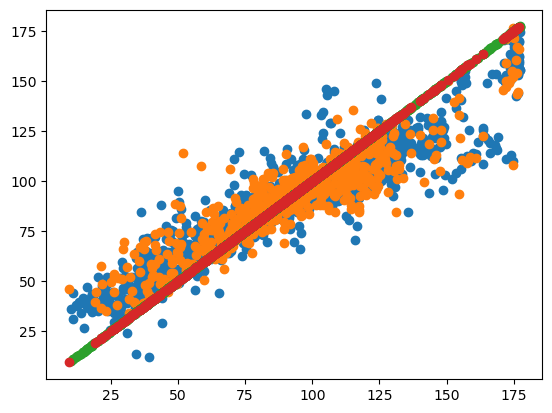

Train R2 0.8753
Test R2 0.8753
Train MAE 4.6795
Test MAE 8.5872

Now fitting krr... 
Completed fitting krr in 22.045215606689453 seconds. 
Now scoring model... 


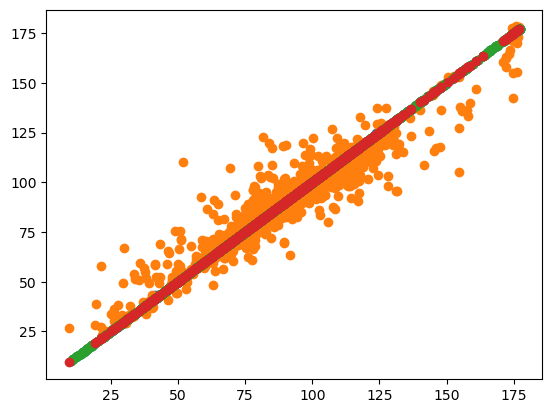

Train R2 0.9999
Test R2 0.9999
Train MAE 0.0566
Test MAE 6.5423

Now fitting gpr... 


/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.230e+04, tolerance: 2.137e+02
  model = cd_fast.enet_coordinate_descent(
/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.424e+04, tolerance: 2.074e+02
  model = cd_fast.enet_coordinate_descent(
/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

Completed fitting gpr in 557.3918695449829 seconds. 
Now scoring model... 


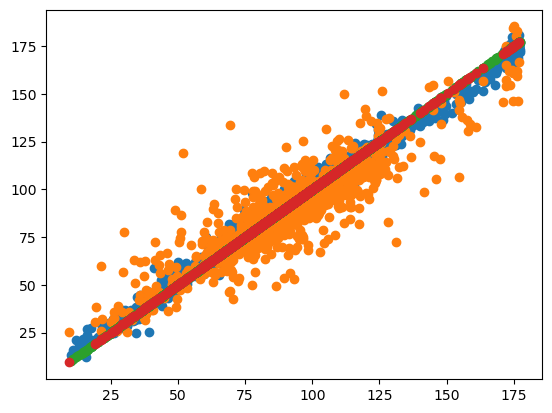

Train R2 0.9896
Test R2 0.9896
Train MAE 1.9909
Test MAE 8.8930


PI
AB
Now fitting ridge... 
Completed fitting ridge in 0.3023369312286377 seconds. 
Now scoring model... 


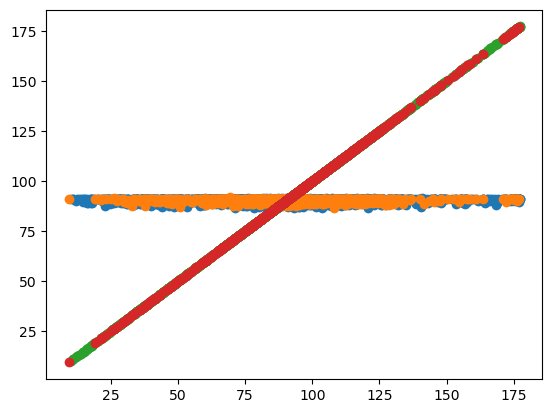

Train R2 0.0015
Test R2 0.0015
Train MAE 20.0303
Test MAE 20.6577

Now fitting lasso... 
Completed fitting lasso in 0.4342994689941406 seconds. 
Now scoring model... 


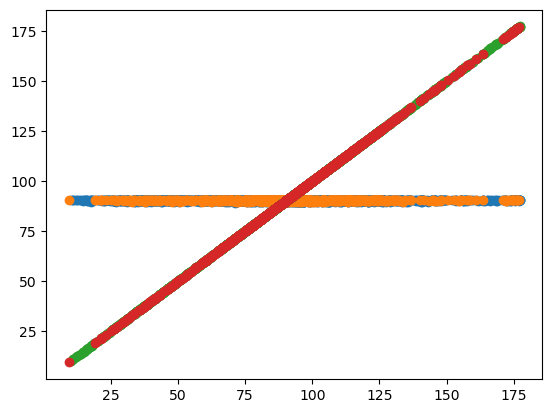

Train R2 0.0004
Test R2 0.0004
Train MAE 19.9878
Test MAE 20.5959

Now fitting elastic... 
Completed fitting elastic in 0.76806640625 seconds. 
Now scoring model... 


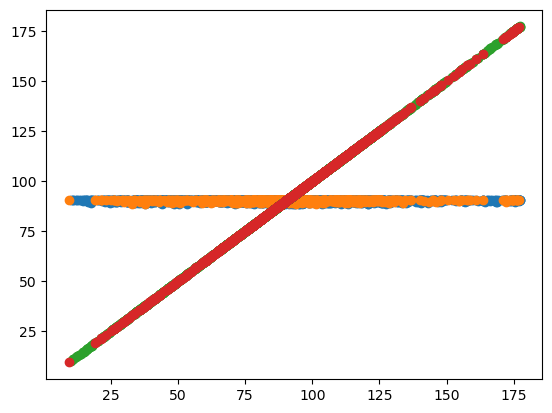

Train R2 0.0006
Test R2 0.0006
Train MAE 20.0040
Test MAE 20.6136

Now fitting knn... 
Completed fitting knn in 0.49239468574523926 seconds. 
Now scoring model... 


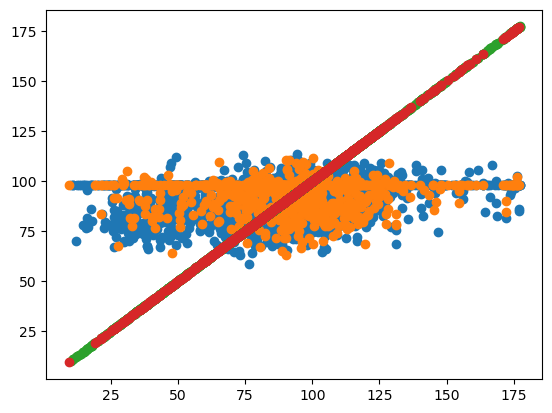

Train R2 0.0273
Test R2 0.0273
Train MAE 20.2320
Test MAE 21.9477

Now fitting rfr... 
Completed fitting rfr in 34.42182421684265 seconds. 
Now scoring model... 


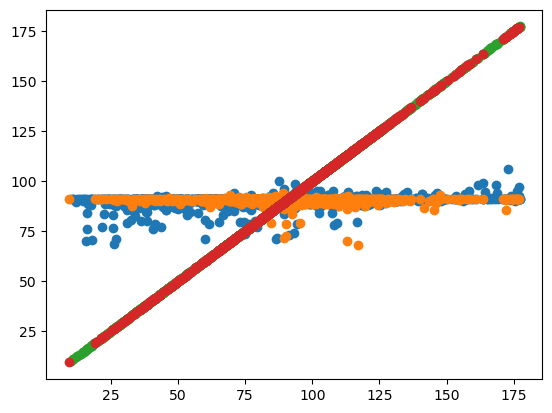

Train R2 0.0269
Test R2 0.0269
Train MAE 19.7773
Test MAE 20.7836

Now fitting grad... 
Completed fitting grad in 38.601253509521484 seconds. 
Now scoring model... 


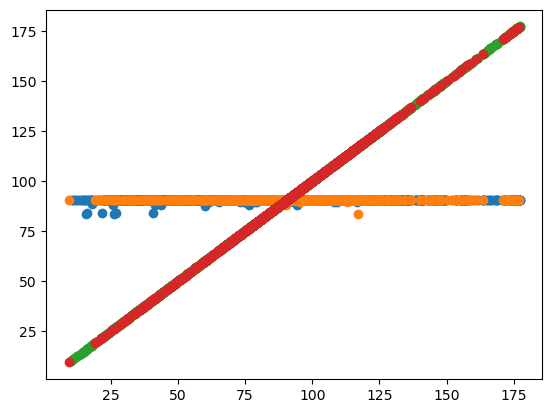

Train R2 0.0024
Test R2 0.0024
Train MAE 19.9581
Test MAE 20.5916

Now fitting svr... 
Completed fitting svr in 44.66437816619873 seconds. 
Now scoring model... 


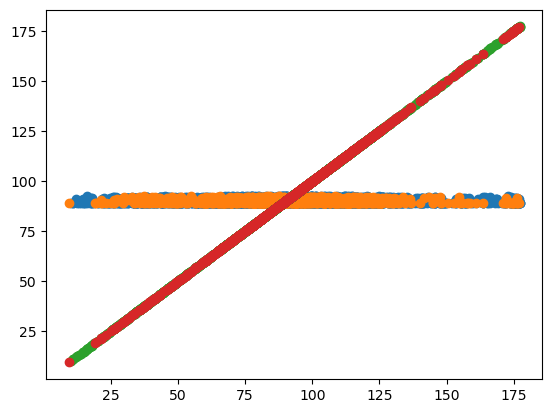

Train R2 -0.0040
Test R2 -0.0040
Train MAE 19.8859
Test MAE 20.5142

Now fitting krr... 
Completed fitting krr in 13.415326595306396 seconds. 
Now scoring model... 


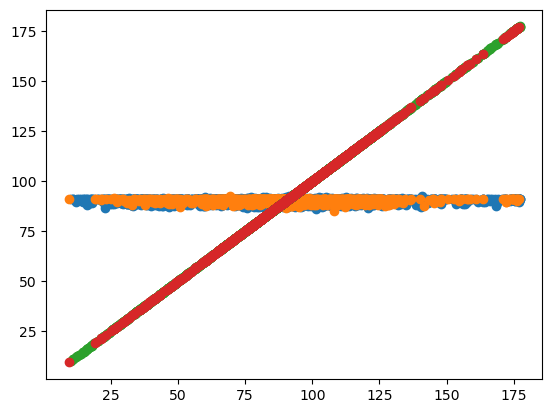

Train R2 0.0021
Test R2 0.0021
Train MAE 20.0268
Test MAE 20.6849

Now fitting gpr... 


The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.


Completed fitting gpr in 85.054203748703 seconds. 
Now scoring model... 


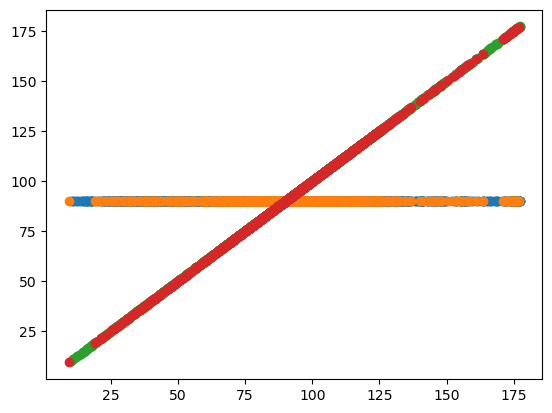

Train R2 -0.0000
Test R2 -0.0000
Train MAE 19.9747
Test MAE 20.5834


CM
AB
Now fitting ridge... 
Completed fitting ridge in 1.7220501899719238 seconds. 
Now scoring model... 


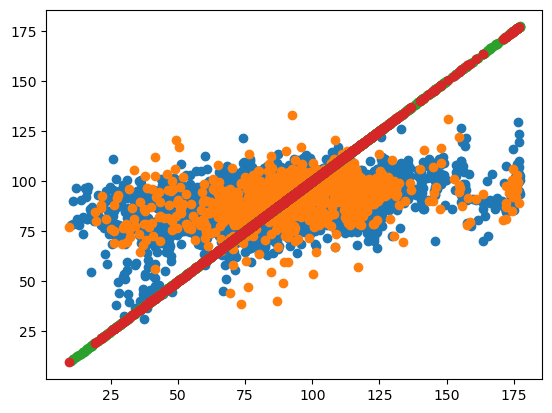

Train R2 0.1645
Test R2 0.1645
Train MAE 18.1958
Test MAE 19.5103

Now fitting lasso... 
Completed fitting lasso in 57.6899950504303 seconds. 
Now scoring model... 


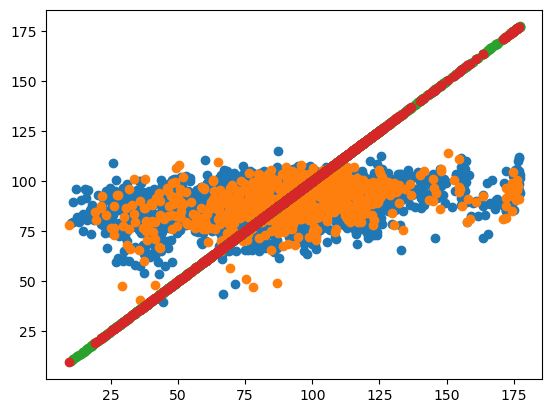

Train R2 0.1177
Test R2 0.1177
Train MAE 18.7840
Test MAE 19.0318

Now fitting elastic... 
Completed fitting elastic in 352.955011844635 seconds. 
Now scoring model... 


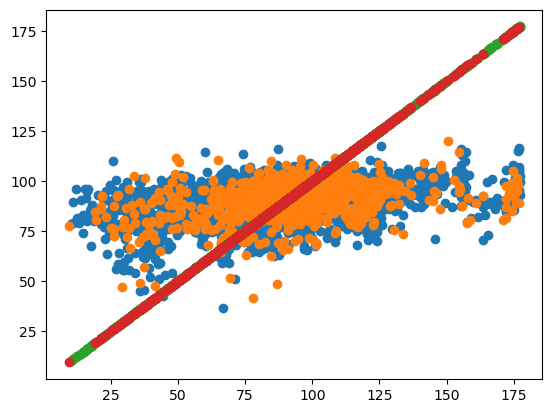

Train R2 0.1314
Test R2 0.1314
Train MAE 18.6289
Test MAE 19.0906

Now fitting knn... 
Completed fitting knn in 1.706908941268921 seconds. 
Now scoring model... 


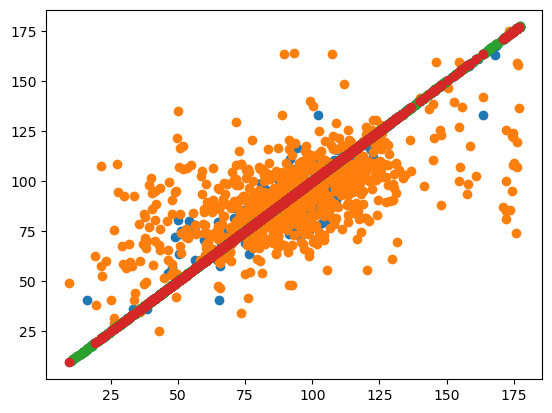

Train R2 0.9909
Test R2 0.9909
Train MAE 0.5125
Test MAE 16.0877

Now fitting rfr... 
Completed fitting rfr in 771.6311092376709 seconds. 
Now scoring model... 


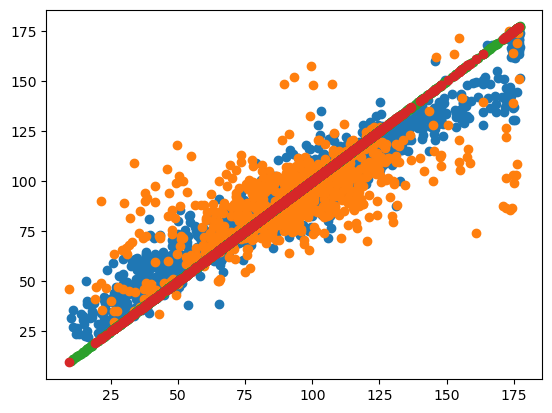

Train R2 0.9171
Test R2 0.9171
Train MAE 5.2328
Test MAE 13.4650

Now fitting grad... 
Completed fitting grad in 885.3571364879608 seconds. 
Now scoring model... 


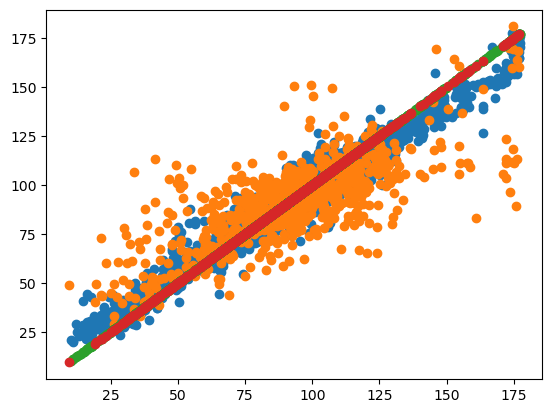

Train R2 0.9480
Test R2 0.9480
Train MAE 4.6582
Test MAE 13.3044

Now fitting svr... 


/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.593e+05, tolerance: 2.066e+02
  model = cd_fast.enet_coordinate_descent(
/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.060

Completed fitting svr in 5886.593606472015 seconds. 
Now scoring model... 


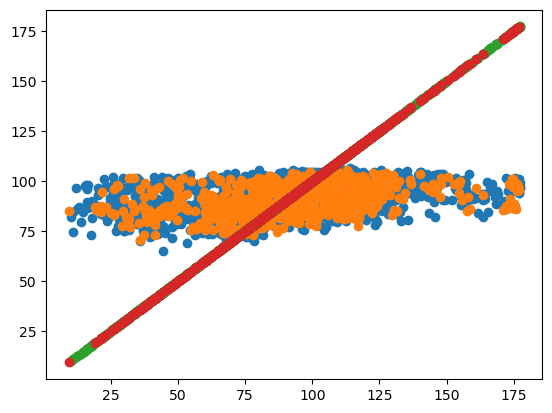

Train R2 0.1311
Test R2 0.1311
Train MAE 17.6778
Test MAE 18.5751

Now fitting krr... 
Completed fitting krr in 117.27812099456787 seconds. 
Now scoring model... 


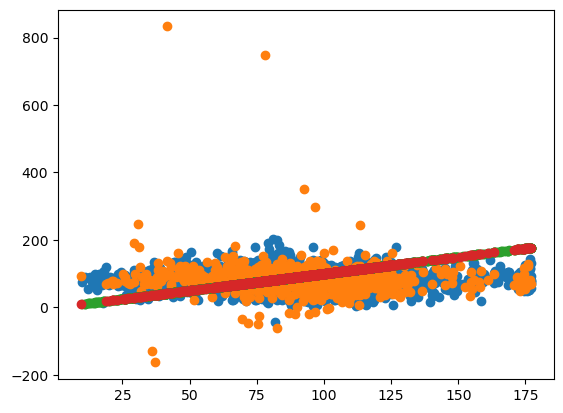

Train R2 -0.8000
Test R2 -0.8000
Train MAE 27.7176
Test MAE 36.5260

Now fitting gpr... 
Completed fitting gpr in 391.44766759872437 seconds. 
Now scoring model... 


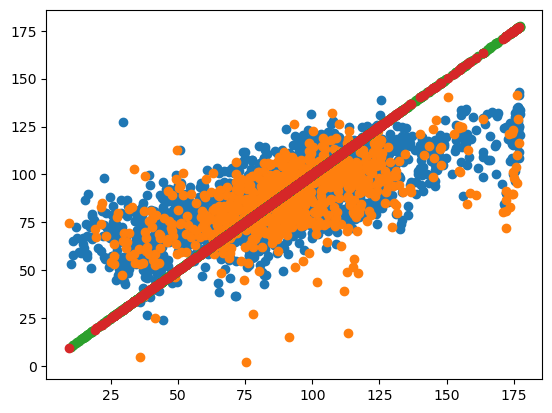

Train R2 0.5123
Test R2 0.5123
Train MAE 13.9501
Test MAE 16.7431

sub
Now fitting ridge... 
Completed fitting ridge in 1.7448036670684814 seconds. 
Now scoring model... 


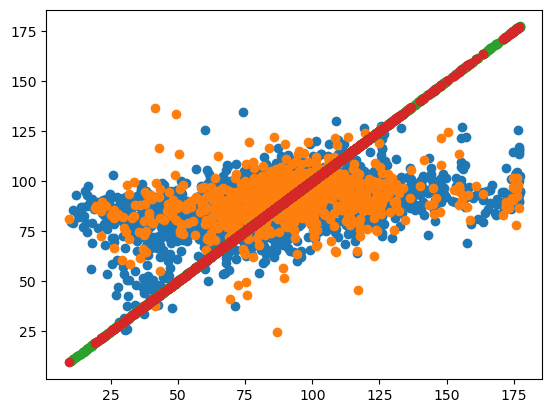

Train R2 0.1746
Test R2 0.1746
Train MAE 17.9611
Test MAE 19.8611

Now fitting lasso... 
Completed fitting lasso in 118.4068968296051 seconds. 
Now scoring model... 


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e+05, tolerance: 2.633e+02


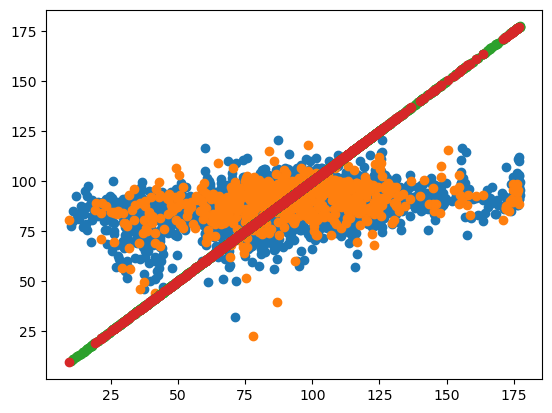

Train R2 0.1229
Test R2 0.1229
Train MAE 18.6575
Test MAE 19.3461

Now fitting elastic... 


/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.426e+05, tolerance: 2.074e+02
  model = cd_fast.enet_coordinate_descent(
/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.188

Completed fitting elastic in 361.5247805118561 seconds. 
Now scoring model... 


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.361e+05, tolerance: 2.633e+02


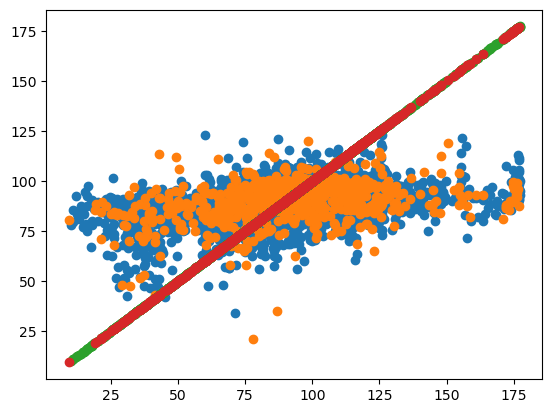

Train R2 0.1366
Test R2 0.1366
Train MAE 18.4751
Test MAE 19.3207

Now fitting knn... 
Completed fitting knn in 1.6986048221588135 seconds. 
Now scoring model... 


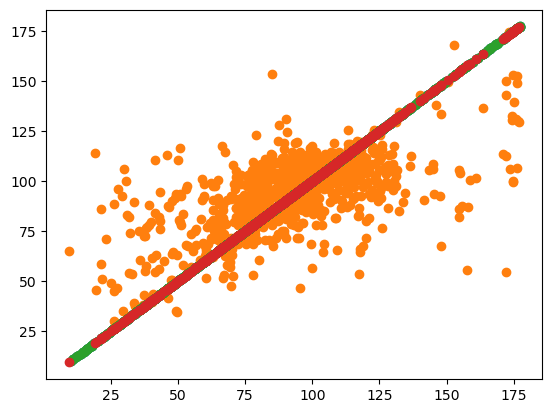

Train R2 1.0000
Test R2 1.0000
Train MAE 0.0000
Test MAE 15.7815

Now fitting rfr... 
Completed fitting rfr in 957.2245283126831 seconds. 
Now scoring model... 


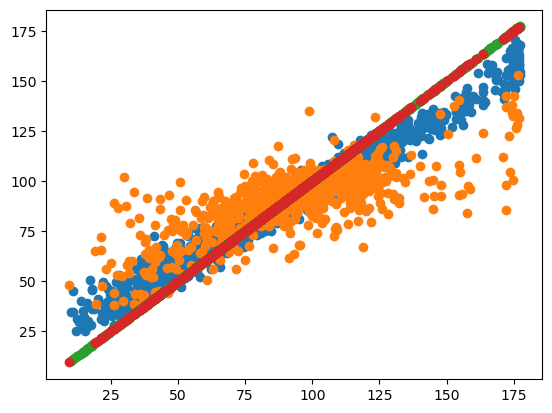

Train R2 0.9324
Test R2 0.9324
Train MAE 5.0791
Test MAE 14.0838

Now fitting grad... 
Completed fitting grad in 967.3702409267426 seconds. 
Now scoring model... 


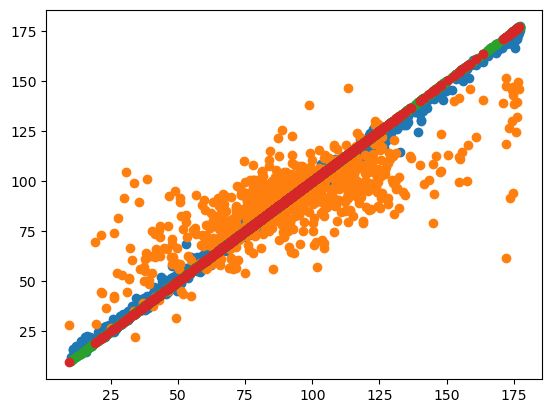

Train R2 0.9948
Test R2 0.9948
Train MAE 1.2919
Test MAE 13.2738

Now fitting svr... 


/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.481e+05, tolerance: 2.074e+02
  model = cd_fast.enet_coordinate_descent(
/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.930e+05, tolerance: 2.066e+02
  model = cd_fast.enet_coordinate_descent(
/home/grierjones/miniconda3/envs/qml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

In [ ]:
scores={}
for k,v in data['X'].items():
    print(k)
    scores[k]={}
    for k1,v1 in v.items():
        scores[k][k1]={}
        if v1 is not None:
            print(k1)
            X,Y=v1.values,y.loc[v1.index].values.flatten()
            X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

            for model in models.keys():
                scores[k][k1][model]=gridsearch(model,X_train, y_train,X_test,y_test)
        else:
            scores[k][k1]=None
    print()

In [ ]:
with open('save_model_test.bin','wb') as f:
    joblib.dump(scores,f)